## Aproximação Polinomial

### Introdução Teórica

Considere um polinômio de grau 𝑝 conforme representado na sua forma geral na Equação 0.1.
𝑝(𝑥) = 𝑤𝑝𝑥
𝑝 + 𝑤𝑝−1𝑥
𝑝−1 + · · · + 𝑤1𝑥 + 𝑤0 
em que 𝑥 é o argumento e 𝑤𝑖 é o coeficiente do termo de grau 𝑖.

#### Exercício 1
Obtenha aproximações polinomiais da função geradora **𝑓𝑔(𝑥) = 1/2𝑥^2 + 3𝑥 + 10**
somadas com um ruído gaussiano 𝑁(𝑚𝑒𝑎𝑛 = 0, 𝑠𝑑 = 4) amostradas entre 𝑥 = −15
e 𝑥 = 10, com um número de amostras 𝑁 = 10 e grau do polinônimo variando
entre 𝑝 = 1 a 𝑝 = 8. Para cada aproximação, mostre um gráfico com a função
geradora, as amostras e a curva do polinômio obtido. como na figura de exemplo
abaixo:
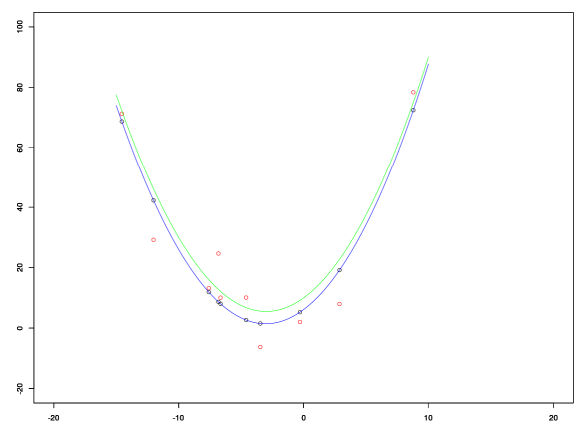

In [3]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

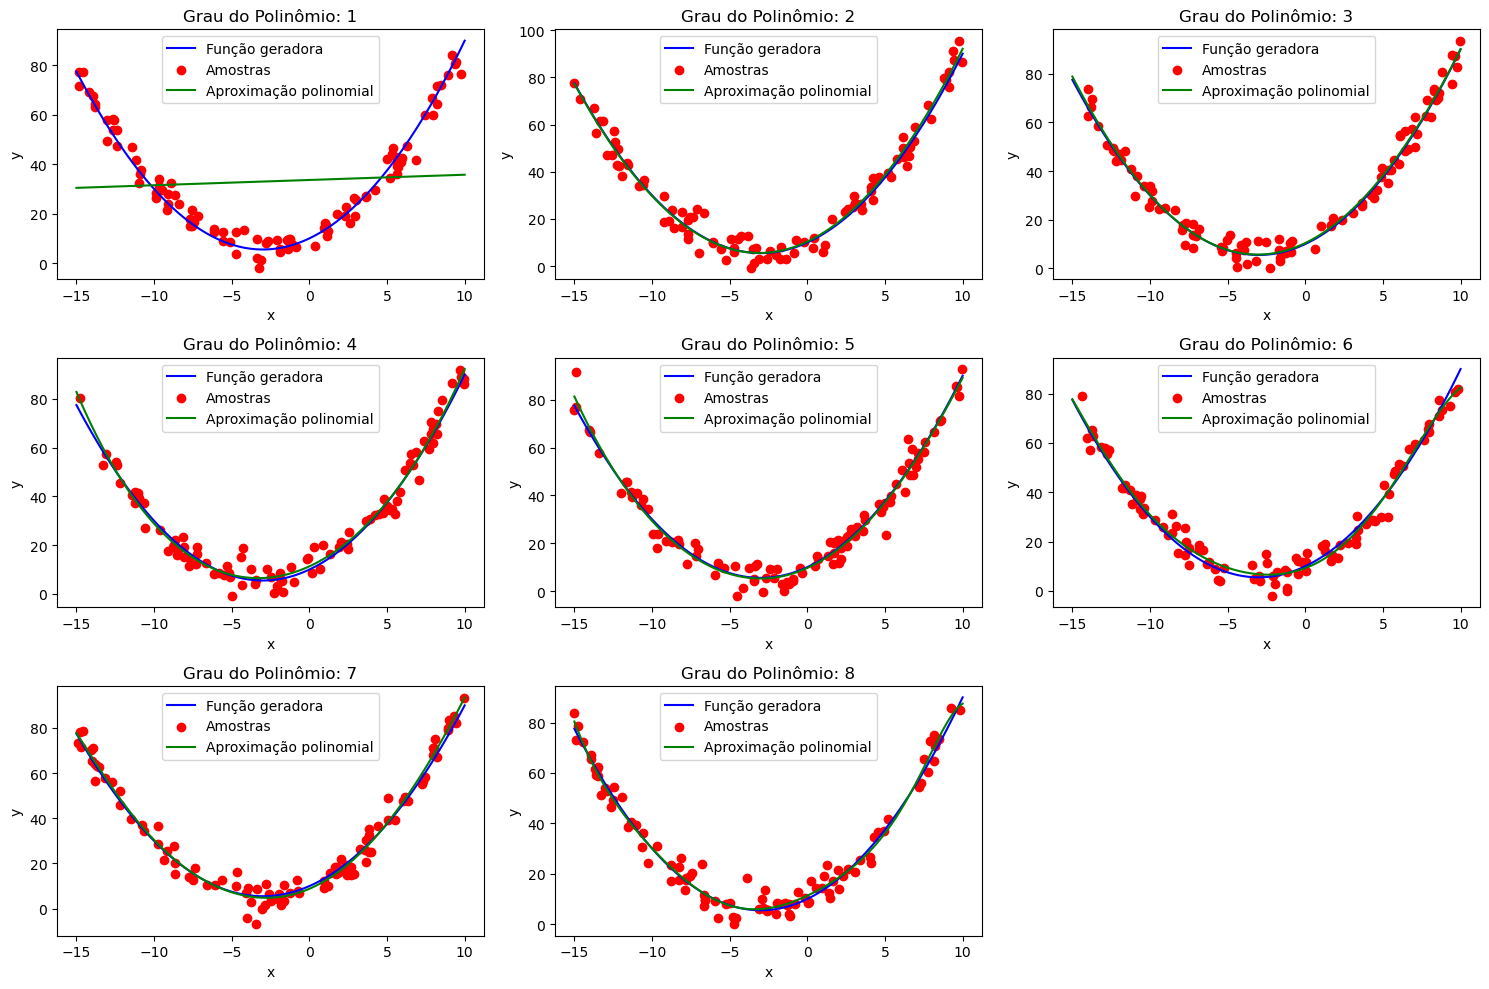

In [12]:
# Definindo função geradora
def f(x):
    return 0.5 * x**2 + 3 * x + 10

# parâmetros do ruído gaussiano
mean_noise, sd_noise = 0, 4

N = 100 # número de amostras
p_values = range(1, 9) # Definir graus dos polinômios a serem ajustados (de 1 a 8)
x_values = np.linspace(-15, 10, 100) # amostradas entre 𝑥 = −15 e 𝑥 = 10

# Parâmetros para a geração dos dados
np.random.seed(99)

# Gerando dados e plotando para cada grau de polinômio
plt.figure(figsize=(15, 10))

for i, p in enumerate(p_values, 1):
    # Gerando amostras
    x_samples = np.random.uniform(-15, 10, N)
    y_samples = f(x_samples) + np.random.normal(mean_noise, sd_noise, N)
    
    # Ajustando o polinômio aos dados
    poly_features = PolynomialFeatures(degree=p) # função importada da biblioteca 
    X_poly = poly_features.fit_transform(x_samples.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_samples)

    # Preparando dados para plotagem
    x_plot = np.linspace(-15, 10, 100)
    X_plot_poly = poly_features.transform(x_plot.reshape(-1, 1))
    y_plot = lin_reg.predict(X_plot_poly)

    # Plotando
    plt.subplot(3, 3, i)
    plt.plot(x_values, f(x_values), label='Função geradora', color='blue')
    plt.scatter(x_samples, y_samples, label='Amostras', color='red')
    plt.plot(x_plot, y_plot, label='Aproximação polinomial', color='green')
    plt.title(f'Grau do Polinômio: {p}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()